# Introduction to DEA Waterbodies <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[DEA Waterbodies](https://cmi.ga.gov.au/data-products/dea/456/waterboards)


## Background
It is important to have up-to-date information about the extent and location of surface water in Australia. 
It provides us with a common understanding of this valuable and increasingly scarce resource.

### What this product offers
[DEA Waterbodies](https://www.ga.gov.au/dea/products/dea-waterbodies) uses Geoscience Australia’s archive of over 30 years of Landsat satellite imagery to identify where almost 300,000 waterbodies are in the Australian landscape and tells us the wet surface area within those waterbodies.

The tool uses a water classification for every available Landsat satellite image and maps the locations of waterbodies across Australia. It provides a time series of wet surface area for waterbodies that are present more than 10% of the time and are larger than 3125 m$^2$ (5 Landsat pixels).

The tool indicates changes in the wet surface area of waterbodies. This can be used to identify when waterbodies are increasing or decreasing in wet surface area.

**Disclaimer: DEA Waterbody graphs show the wet surface area of waterbodies as estimated from satellites. They do not show depth, volume, purpose of the waterbody, nor the source of the water.**

The product contains polygons of maximum extent and surface area time series for each waterbody. These waterbodies have been derived from [Water Observations from Space](https://www.ga.gov.au/dea/products/wofs), a classifier which detects open water in Landsat pixels.

### Applications
* Understand and manage water across Australia
* Gain insights into the severity and spatial distribution of drought
* Identify potential water sources for aerial firefighting during bushfires

### Publications
* Krause, C. et al. (in preparation)
* Mueller, N., Lewis, A., Roberts, D., Ring, S., Melrose, R., Sixsmith, J., Lymburner, L., McIntyre, A., Tan, P., Curnow, S., & Ip, A. (2016). Water observations from space: Mapping surface water from 25 years of Landsat imagery across Australia. *Remote Sensing of Environment*, 174, 341–352. https://doi.org/10.1016/j.rse.2015.11.003

> **Note:** For more technical information about DEA Waterbodies, visit the official [Geoscience Australia DEA Waterbodies product description](https://cmi.ga.gov.au/data-products/dea/456/waterboards).

## Description
This notebook will demonstrate how to load data from DEA Waterbodies using the scripts in this repository.
Topics covered include:

1. Getting a list of available polygons in an area
2. Accessing a polygon
3. Plotting the surface area of the polygon over time

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import sys
import matplotlib.pyplot as plt

sys.path.append("../Scripts")
from dea_plotting import display_map
import dea_waterbodies

## Analysis parameters

Choose an area to analyse:

In [2]:
xlim = (149.05, 149.19)
ylim = (-35.21, -35.33)

# Preview area on a map
display_map(xlim, ylim)

## Getting data

Every waterbody in DEA Waterbodies has a unique identifier called a [_geohash_](https://en.wikipedia.org/wiki/Geohash). The geohash of a waterbody is derived from their position, and this process can be reversed to obtain the location from the geohash. You can also get the geohash for a waterbody from [DEA Maps](http://maps.dea.ga.gov.au/) by clicking on a waterbody. It's the "waterbody identifier" in this screenshot:

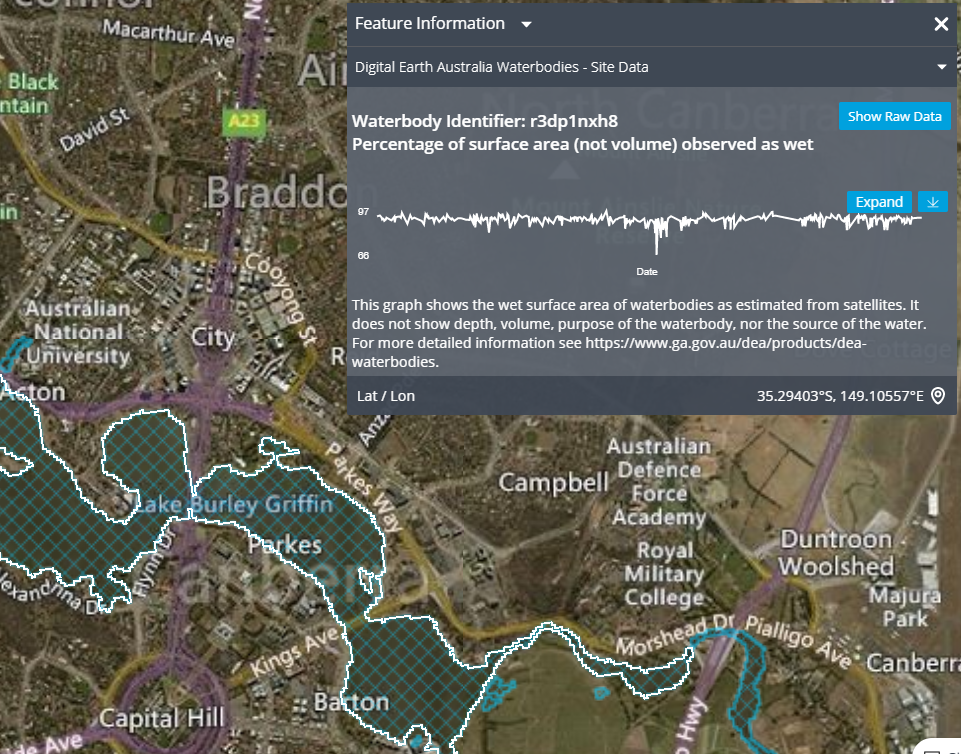

The `dea_waterbodies` module allows you to query waterbodies by geohash or by location.

### List geohashes and polygons in an area
We can get a list of geohashes for all waterbodies inside a bounding box of coordinates using `get_geohashes`.

In [3]:
# Create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])

# Use bounding box to get a list of matching geohashes
gh = dea_waterbodies.get_geohashes(bbox, crs="EPSG:4326")

We can inspect the first five results to view their geohashes:

In [4]:
gh[0:5]

['r39zp9pjf', 'r39zpc8bq', 'r39zpevqy', 'r39zpgh8j', 'r39zpv9py']

You might notice that these all have a similar prefix (r39zp). If two geohashes have a similar prefix, then they are close together. (The inverse is not always true.)

We can also get all polygons for the same area by passing the same bounding box to `get_waterbodies`.

In [5]:
polys = dea_waterbodies.get_waterbodies(bbox, crs="EPSG:4326")

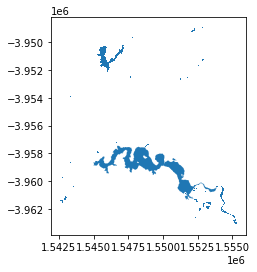

In [6]:
polys.plot()

### Getting data for a specific waterbody

We can use a geohash to get the polygon for an individual waterbody.
For example, we can load data for Canberra's Lake Burley Griffin using its geohash `r3dp1nxh8`.

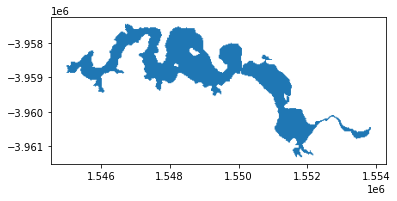

In [7]:
dea_waterbodies.get_waterbody("r3dp1nxh8").plot()

The polygon also contains metadata including the waterbody's area, perimeter and ID:

In [8]:
dea_waterbodies.get_waterbody("r3dp1nxh8")

,id,area,perimeter,uid,wb_id,timeseries,geometry
0,DigitalEarthAustraliaWaterbodies.141211,6.478750e+06,52200.499279,r3dp1nxh8,141210,https://data.dea.ga.gov.au/projects/WaterBodie...,"POLYGON ((1550700.000 -3958350.000, 1550750.00..."


For any given geohash or a polygon, we can also use the `get_time_series` function to get surface area over time.
For example, surface area data for the first polygon in `polys` (a waterbody in the new suburb of Coombs, Canberra) shows that it was constructed in 2013:

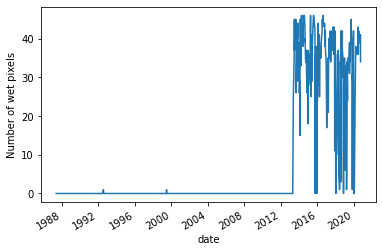

In [9]:
dea_waterbodies.get_time_series(waterbody=polys.iloc[0])["px_wet"].plot()
plt.ylabel("Number of wet pixels");

Canberra's Lake Burley Griffin is more consistent over time:

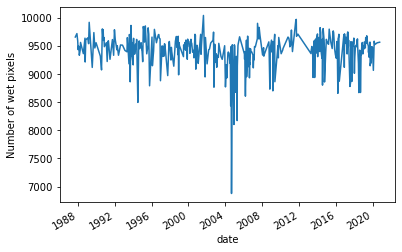

In [10]:
dea_waterbodies.get_time_series(geohash="r3dp1nxh8")["px_wet"].plot()
plt.ylabel("Number of wet pixels");

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** November 2020

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)